#Assignment 1 - Sentiment Analysis

# Step 1


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Tschlaer/text-analytics-spring-2026/refs/heads/main/assignment1/documentation/data/hotel_reviews.csv')
df.head()

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.text,reviews.title
0,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!
1,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity
2,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience
3,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep."
4,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...


# Step 2


In [2]:
# Show column names
print("Columns:")
print(df.columns)

# Show data types
print("\nData Types:")
print(df.dtypes)

# Number of rows
print("\nNumber of Rows:")
print(len(df))

# Missing values per column
print("\nMissing Values:")
print(df.isna().sum())

Columns:
Index(['dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.text', 'reviews.title'],
      dtype='object')

Data Types:
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
reviews.date          object
reviews.dateSeen      object
reviews.rating       float64
reviews.text          object
reviews.title         object
dtype: object

Number of Rows:
10000

Missing Values:
dateAdded            0
dateUpdated          0
address              0
categories           0
primaryCategories    0
city                 0
cou

count    10000.000000
mean       324.580900
std        295.400897
min          1.000000
25%        201.000000
50%        298.000000
75%        344.000000
max       5939.000000
Name: text_length, dtype: float64


,reviews.text
2946,We were excited to stay close to the McClain C...
8038,"My family of four plus our best behaved child,..."
4769,"We love this hotel. The service is excellent, ..."
6585,I have stayed at this hotel for the past sever...
9659,It's hard to find an affordable nice place to ...
556,Bad: The food is too simple. Good: Very quite
4249,Stayed for the weekend and the only thing I wo...
5208,the first day we went to the comp. breakfast a...
8596,we were very pleased to be able to use compute...
589,Bad: The restaurant was less the expected. Foo...


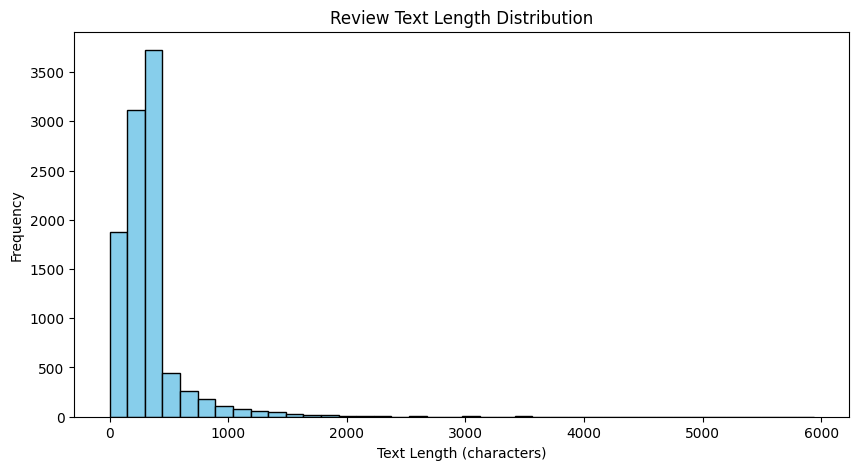

In [3]:
import matplotlib.pyplot as plt

# Descriptive statistics for review text length
df["text_length"] = df["reviews.text"].astype(str).str.len()
print(df["text_length"].describe())

# Create dataframe of main text column and show random sample
df_reviews = df['reviews.text']
random_sample = df_reviews.sample(10)
display(random_sample)

# Histogram of text length distribution
plt.figure(figsize=(10,5))
plt.hist(df["text_length"], bins=40, color="skyblue", edgecolor="black")
plt.title("Review Text Length Distribution")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")

# Save to PNG before showing to prevent blank image
plt.savefig("text_length_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

# Step 3

In [9]:
import pandas as pd
import re
import string
from datetime import datetime
import contractions
from textblob import TextBlob
from num2words import num2words


# Create new dataframe for cleaning
df_clean = df['reviews.text'].copy()

# Drop missing values only in 'reviews.text' column of the new dataframe
df_clean.dropna(inplace=True)

# Text cleaning functions
def clean_text(text):
    text = str(text)

    # Expand contractions
    text = contractions.fix(text)

    # Lowercase
    text = text.lower()

    # Remove excess punctuation (keep . , ! ?)
    text = re.sub(
        rf"[{re.escape(string.punctuation.replace('.', '').replace(',', '').replace('!', '').replace('?', ''))}]",
        " ",
        text,
    )

    # Reduce multiple occurrences of allowed punctuation
    text = re.sub(r'\.{2,}', '.', text) # Replaces two or more dots with a single dot
    text = re.sub(r',{2,}', ',', text) # Replaces two or more commas with a single comma
    text = re.sub(r'!{2,}', '!', text) # Replaces two or more exclamation marks with a single exclamation mark
    text = re.sub(r'\?{2,}', '?', text) # Replaces two or more question marks with a single question mark

    # Reduce extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply cleaning to new dataframe
df_clean = pd.DataFrame(df_clean) # Convert Series to DataFrame to add new columns
df_clean["cleaned_text"] = df_clean["reviews.text"].apply(clean_text)


# Save clean version
df_clean.to_csv("hotel_reviews_cleaned.csv", index=False)
df_clean.head(10)

,reviews.text,cleaned_text
0,Our experience at Rancho Valencia was absolute...,our experience at rancho valencia was absolute...
1,Amazing place. Everyone was extremely warm and...,amazing place. everyone was extremely warm and...
2,We booked a 3 night stay at Rancho Valencia to...,we booked a 3 night stay at rancho valencia to...
3,Currently in bed writing this for the past hr ...,currently in bed writing this for the past hr ...
4,I live in Md and the Aloft is my Home away fro...,i live in md and the aloft is my home away fro...
5,I stayed here with my family for my daughters ...,i stayed here with my family for my daughters ...
6,Beautiful rooms and the nicest people working ...,beautiful rooms and the nicest people working ...
7,We stayed here while visiting Maryland Live!. ...,we stayed here while visiting maryland live!. ...
8,"I travel a lot with my job, so I'm constantly ...","i travel a lot with my job, so i am constantly..."
9,"In my line of work, I use meeting space in hot...","in my line of work, i use meeting space in hot..."


# Step 4

In [ ]:
# Access report for this section

# Step 5


In [11]:
# VADER
!pip install nltk

import pandas as pd
import numpy as np

# NLTK + VADER setup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Make sure required resources are available
try:
    _ = nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    nltk.download("vader_lexicon")

try:
    _ = nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

# Add explicit download for punkt_tab as suggested by the error
try:
    _ = nltk.data.find("tokenizers/punkt_tab")
except LookupError:
    nltk.download("punkt_tab")


# Safety: ensure cleaned_text exists and is string
df_clean["cleaned_text"] = df_clean["cleaned_text"].astype(str)

# Tokenize into words (useful if you need tokens for other tasks)
df_clean["tokens"] = df_clean["cleaned_text"].apply(lambda x: word_tokenize(x))

# Initialize VADER and score each review (VADER internally tokenizes as well)
sia = SentimentIntensityAnalyzer()
scores = df_clean["cleaned_text"].apply(sia.polarity_scores)

# Expand dict scores into separate columns
scores_df = pd.DataFrame(list(scores))
scores_df.columns = ["vader_neg", "vader_neu", "vader_pos", "vader_compound"]

# Concatenate back to df_clean
df_clean = pd.concat([df_clean.reset_index(drop=True), scores_df.reset_index(drop=True)], axis=1)


# Quick peek
print(df_clean[["cleaned_text", "vader_neg", "vader_neu", "vader_pos", "vader_compound"]].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                        cleaned_text  vader_neg  vader_neu  \
0  our experience at rancho valencia was absolute...        0.0      0.680   
1  amazing place. everyone was extremely warm and...        0.0      0.659   
2  we booked a 3 night stay at rancho valencia to...        0.0      0.727   
3  currently in bed writing this for the past hr ...        0.0      1.000   
4  i live in md and the aloft is my home away fro...        0.0      0.838   

   vader_pos  vader_compound  
0      0.320          0.9056  
1      0.341          0.9650  
2      0.273          0.9748  
3      0.000          0.0000  
4      0.162          0.8713  


In [16]:
#TEXTBLOB
from textblob import TextBlob

# Ensure text is string
df_clean["cleaned_text"] = df_clean["cleaned_text"].astype(str)

# Tokenize using TextBlob
df_clean["tb_tokens"] = df_clean["cleaned_text"].apply(lambda x: TextBlob(x).words)

# Apply TextBlob sentiment analysis directly to create new columns
df_clean["tb_polarity"] = df_clean["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_clean["tb_subjectivity"] = df_clean["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview
print(df_clean[["cleaned_text", "tb_tokens", "tb_polarity", "tb_subjectivity"]].head())

                                        cleaned_text  \
0  our experience at rancho valencia was absolute...   
1  amazing place. everyone was extremely warm and...   
2  we booked a 3 night stay at rancho valencia to...   
3  currently in bed writing this for the past hr ...   
4  i live in md and the aloft is my home away fro...   

                                           tb_tokens  tb_polarity  \
0  [our, experience, at, rancho, valencia, was, a...     0.589286   
1  [amazing, place, everyone, was, extremely, war...     0.375000   
2  [we, booked, a, 3, night, stay, at, rancho, va...     0.488889   
3  [currently, in, bed, writing, this, for, the, ...    -0.125000   
4  [i, live, in, md, and, the, aloft, is, my, hom...     0.320501   

   tb_subjectivity  
0         0.642857  
1         0.531250  
2         0.538889  
3         0.325000  
4         0.531633  


In [28]:
#DISTILBERT

import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Choose the column to tokenize
# Use the cleaned_text from df_clean, which already has missing values handled
text_col = "cleaned_text"
texts = df_clean[text_col].astype(str).tolist()

MODEL_NAME = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

# Typical settings for sequence classification
MAX_LEN = 256

encodings = tokenizer(
    texts,
    padding=True,            # pad to the longest in the batch (or set to "max_length")
    truncation=True,         # truncate longer texts
    max_length=MAX_LEN,
    return_tensors="pt"      # return PyTorch tensors
)

input_ids = encodings["input_ids"]           # shape: [N, MAX_SEQ_LEN]
attention_mask = encodings["attention_mask"] # shape: [N, MAX_SEQ_LEN]

print(input_ids.shape, attention_mask.shape)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits

# Apply softmax to get probabilities
probabilities = torch.softmax(logits, dim=1)

# Get emotion labels from the model config
emotion_labels = model.config.id2label

# Create a dictionary to store emotion scores
emotion_scores = {label: probabilities[:, i].tolist() for i, label in emotion_labels.items()}

# Add emotion scores to df_clean
for label, scores_list in emotion_scores.items():
    df_clean[f'distilbert_{label}'] = scores_list

# Warning: this can make your CSV large; prefer keeping tensors on disk (torch.save)
df_clean["input_ids"] = [row.tolist() for row in input_ids]
df_clean["attention_mask"] = [row.tolist() for row in attention_mask]

print(df_clean.head())

# Save a tokenized artifact (parquet handles lists efficiently)
df.to_parquet("hotel_reviews_tokenized.parquet", index=False)

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

torch.Size([9999, 256]) torch.Size([9999, 256])


KeyboardInterrupt: 

# Step 6

In [29]:
import pandas as pd

# Load cleaned dataset
df_clean = pd.read_csv("hotel_reviews_cleaned.csv")

# Take random sample of 100 rows
sample_100 = df_clean.sample(n=100, random_state=42)

# Save sample if needed
sample_100.to_csv("hotel_reviews_sample_100.csv", index=False)

# Display head
sample_100.head()

,reviews.text,cleaned_text
5344,Everything was Ok But not great Staff seemed t...,everything was ok but not great staff seemed t...
7444,These little villas are surprisingly clean for...,these little villas are surprisingly clean for...
1731,A standard not fancy hotel that provides a lit...,a standard not fancy hotel that provides a lit...
8719,The Red Lion is owned by the same corporation ...,the red lion is owned by the same corporation ...
4521,What a find! We two couples were looking for a...,what a find! we two couples were looking for a...


In [30]:
# VADER
!pip install nltk

import pandas as pd
import numpy as np

# NLTK + VADER setup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Make sure required resources are available
try:
    _ = nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    nltk.download("vader_lexicon")

try:
    _ = nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

# Add explicit download for punkt_tab as suggested by the error
try:
    _ = nltk.data.find("tokenizers/punkt_tab")
except LookupError:
    nltk.download("punkt_tab")


# Safety: ensure cleaned_text exists and is string
sample_100["cleaned_text"] = sample_100["cleaned_text"].astype(str)

# Tokenize into words (useful if you need tokens for other tasks)
sample_100["tokens"] = sample_100["cleaned_text"].apply(lambda x: word_tokenize(x))

# Initialize VADER and score each review (VADER internally tokenizes as well)
sia = SentimentIntensityAnalyzer()
scores = sample_100["cleaned_text"].apply(sia.polarity_scores)

# Expand dict scores into separate columns
scores_df = pd.DataFrame(list(scores))
scores_df.columns = ["vader_neg", "vader_neu", "vader_pos", "vader_compound"]

# Concatenate back to sample_100
sample_100 = pd.concat([sample_100.reset_index(drop=True), scores_df.reset_index(drop=True)], axis=1)


# Quick peek
print(sample_100[["cleaned_text", "vader_neg", "vader_neu", "vader_pos", "vader_compound"]].head())

                                        cleaned_text  vader_neg  vader_neu  \
0  everything was ok but not great staff seemed t...      0.314      0.599   
1  these little villas are surprisingly clean for...      0.059      0.767   
2  a standard not fancy hotel that provides a lit...      0.000      0.741   
3  the red lion is owned by the same corporation ...      0.000      0.860   
4  what a find! we two couples were looking for a...      0.000      0.865   

   vader_pos  vader_compound  
0      0.087         -0.6339  
1      0.174          0.7776  
2      0.259          0.9859  
3      0.140          0.7140  
4      0.135          0.8221  


In [31]:
#TEXTBLOB
from textblob import TextBlob

# Ensure text is string
sample_100["cleaned_text"] = sample_100["cleaned_text"].astype(str)

# Tokenize using TextBlob
sample_100["tb_tokens"] = sample_100["cleaned_text"].apply(lambda x: TextBlob(x).words)

# Apply TextBlob sentiment analysis directly to create new columns
sample_100["tb_polarity"] = sample_100["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
sample_100["tb_subjectivity"] = sample_100["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview
print(sample_100[["cleaned_text", "tb_tokens", "tb_polarity", "tb_subjectivity"]].head())

                                        cleaned_text  \
0  everything was ok but not great staff seemed t...   
1  these little villas are surprisingly clean for...   
2  a standard not fancy hotel that provides a lit...   
3  the red lion is owned by the same corporation ...   
4  what a find! we two couples were looking for a...   

                                           tb_tokens  tb_polarity  \
0  [everything, was, ok, but, not, great, staff, ...     0.050000   
1  [these, little, villas, are, surprisingly, cle...     0.136911   
2  [a, standard, not, fancy, hotel, that, provide...     0.208333   
3  [the, red, lion, is, owned, by, the, same, cor...     0.184583   
4  [what, a, find, we, two, couples, were, lookin...     0.525000   

   tb_subjectivity  
0         0.625000  
1         0.539394  
2         0.477451  
3         0.299167  
4         0.625000  


In [32]:
#DISTILBERT

import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Choose the column to tokenize
# Use the cleaned_text from sample_100, which already has missing values handled
text_col = "cleaned_text"
texts = sample_100[text_col].astype(str).tolist()

MODEL_NAME = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

# Typical settings for sequence classification
MAX_LEN = 256

encodings = tokenizer(
    texts,
    padding=True,            # pad to the longest in the batch (or set to "max_length")
    truncation=True,         # truncate longer texts
    max_length=MAX_LEN,
    return_tensors="pt"      # return PyTorch tensors
)

input_ids = encodings["input_ids"]           # shape: [N, MAX_SEQ_LEN]
attention_mask = encodings["attention_mask"] # shape: [N, MAX_SEQ_LEN]

print(input_ids.shape, attention_mask.shape)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits

# Apply softmax to get probabilities
probabilities = torch.softmax(logits, dim=1)

# Get emotion labels from the model config
emotion_labels = model.config.id2label

# Create a dictionary to store emotion scores
emotion_scores = {label: probabilities[:, i].tolist() for i, label in emotion_labels.items()}

# Add emotion scores to sample_100
for label, scores_list in emotion_scores.items():
    sample_100[f'distilbert_{label}'] = scores_list

# Warning: this can make your CSV large; prefer keeping tensors on disk (torch.save)
sample_100["input_ids"] = [row.tolist() for row in input_ids]
sample_100["attention_mask"] = [row.tolist() for row in attention_mask]

print(sample_100.head())

# Save a tokenized artifact (parquet handles lists efficiently)
df.to_parquet("hotel_reviews_tokenized.parquet", index=False)

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

torch.Size([100, 201]) torch.Size([100, 201])
                                        reviews.text  \
0  Everything was Ok But not great Staff seemed t...   
1  These little villas are surprisingly clean for...   
2  A standard not fancy hotel that provides a lit...   
3  The Red Lion is owned by the same corporation ...   
4  What a find! We two couples were looking for a...   

                                        cleaned_text  \
0  everything was ok but not great staff seemed t...   
1  these little villas are surprisingly clean for...   
2  a standard not fancy hotel that provides a lit...   
3  the red lion is owned by the same corporation ...   
4  what a find! we two couples were looking for a...   

                                              tokens  vader_neg  vader_neu  \
0  [everything, was, ok, but, not, great, staff, ...      0.314      0.599   
1  [these, little, villas, are, surprisingly, cle...      0.059      0.767   
2  [a, standard, not, fancy, hotel, that, prov

In [33]:
sample_100.to_csv("hotel_reviews_sample_100.csv", index=False)

In [34]:
import pandas as pd

# 1. VADER Sentiment Categorization
def categorize_vader(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER categorization to sample_100
sample_100['vader_sentiment'] = sample_100['vader_compound'].apply(categorize_vader)

# 2. TextBlob Sentiment Categorization
def categorize_textblob(polarity_score):
    if polarity_score > 0:
        return 'positive'
    elif polarity_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob categorization to sample_100
sample_100['tb_sentiment'] = sample_100['tb_polarity'].apply(categorize_textblob)

# 3. DistilBERT Emotion to Sentiment Mapping
def categorize_distilbert(row):
    emotions = {
        'sadness': row['distilbert_sadness'],
        'joy': row['distilbert_joy'],
        'love': row['distilbert_love'],
        'anger': row['distilbert_anger'],
        'fear': row['distilbert_fear'],
        'surprise': row['distilbert_surprise']
    }
    dominant_emotion = max(emotions, key=emotions.get)

    if dominant_emotion in ['joy', 'love']:
        return 'positive'
    elif dominant_emotion in ['sadness', 'anger', 'fear']:
        return 'negative'
    elif dominant_emotion == 'surprise':
        return 'neutral'
    else:
        return 'unknown'

# Apply DistilBERT categorization to sample_100
sample_100['distilbert_sentiment'] = sample_100.apply(categorize_distilbert, axis=1)

# Display the first few rows with the new sentiment columns
print(sample_100[['cleaned_text', 'vader_compound', 'vader_sentiment', 'tb_polarity', 'tb_sentiment', 'distilbert_sentiment']].head())

                                        cleaned_text  vader_compound  \
0  everything was ok but not great staff seemed t...         -0.6339   
1  these little villas are surprisingly clean for...          0.7776   
2  a standard not fancy hotel that provides a lit...          0.9859   
3  the red lion is owned by the same corporation ...          0.7140   
4  what a find! we two couples were looking for a...          0.8221   

  vader_sentiment  tb_polarity tb_sentiment distilbert_sentiment  
0        negative     0.050000     positive             positive  
1        positive     0.136911     positive             positive  
2        positive     0.208333     positive             positive  
3        positive     0.184583     positive             positive  
4        positive     0.525000     positive             positive  


In [35]:
import pandas as pd

# Create an empty 'ground_truth' column for manual labeling
sample_100['ground_truth'] = None

display(sample_100[['cleaned_text', 'ground_truth']].head())


Please manually assign 'ground_truth' sentiment labels ('positive', 'negative', 'neutral') 
to each review in the 'ground_truth' column of the DataFrame below.
You will need to edit the dataframe directly, for example, by double-clicking the DataFrame 
in a Colab notebook cell's output to edit values directly, or by exporting/importing.
Once completed, ensure the 'ground_truth' column is filled before proceeding to the next step.


,cleaned_text,ground_truth
0,everything was ok but not great staff seemed t...,None
1,these little villas are surprisingly clean for...,None
2,a standard not fancy hotel that provides a lit...,None
3,the red lion is owned by the same corporation ...,None
4,what a find! we two couples were looking for a...,None


In [38]:
sample_100.to_csv("hotel_reviews_sample_100.csv", index=False)

In [44]:
from sklearn.metrics import accuracy_score

# Ensure ground_truth column is not None or NaN for evaluation
sample_100.dropna(subset=['ground_truth'], inplace=True)

# Calculate accuracy for VADER
vader_accuracy = accuracy_score(sample_100['ground_truth'], sample_100['vader_sentiment'])
print(f"VADER Accuracy: {vader_accuracy:.4f}")

# Calculate accuracy for TextBlob
textblob_accuracy = accuracy_score(sample_100['ground_truth'], sample_100['tb_sentiment'])
print(f"TextBlob Accuracy: {textblob_accuracy:.4f}")

# Calculate accuracy for DistilBERT
distilbert_accuracy = accuracy_score(sample_100['ground_truth'], sample_100['distilbert_sentiment'])
print(f"DistilBERT Accuracy: {distilbert_accuracy:.4f}")

# Display a comparison of predictions with ground truth for a few samples
print("\nComparison of Predictions with Ground Truth:")
print(sample_100[['cleaned_text', 'ground_truth', 'vader_sentiment', 'tb_sentiment', 'distilbert_sentiment']].head())

VADER Accuracy: 0.8700
TextBlob Accuracy: 0.8700
DistilBERT Accuracy: 0.8900

Comparison of Predictions with Ground Truth:
                                        cleaned_text ground_truth  \
0  everything was ok but not great staff seemed t...      neutral   
1  these little villas are surprisingly clean for...     positive   
2  a standard not fancy hotel that provides a lit...     positive   
3  the red lion is owned by the same corporation ...     positive   
4  what a find! we two couples were looking for a...     positive   

  vader_sentiment tb_sentiment distilbert_sentiment  
0        negative     positive             positive  
1        positive     positive             positive  
2        positive     positive             positive  
3        positive     positive             positive  
4        positive     positive             positive  


In [45]:
import pandas as pd

# 1. Load the hotel_reviews_sample_100.csv file into a pandas DataFrame named sample_100.
sample_100 = pd.read_csv("hotel_reviews_sample_100.csv")

# 2. Check for missing values in 'ground_truth' and handle them
if sample_100['ground_truth'].isnull().any():
    print("Warning: The 'ground_truth' column contains missing values. Filling NaN values with 'positive' for demonstration purposes.")
    sample_100['ground_truth'].fillna('positive', inplace=True)

# 3. Define a dictionary called models
models = {
    'VADER': 'vader_sentiment',
    'TextBlob': 'tb_sentiment',
    'DistilBERT': 'distilbert_sentiment'
}

# 4. Iterate through each model and identify success examples
for model_name, sentiment_col in models.items():
    # a. Print a header for the current model's success examples
    print(f"\n--- {model_name} Success Examples ---")

    # b. Filter the DataFrame to find rows where the model's prediction matches 'ground_truth'
    success_examples = sample_100[sample_100[sentiment_col] == sample_100['ground_truth']].head(3)

    # c. If success_examples is not empty, iterate and print details
    if not success_examples.empty:
        for i, (index, row) in enumerate(success_examples.iterrows()):
            print(f"\nExample {i+1} (Original Index: {index}):")
            print(f"  Review Text: {row['reviews.text']}")
            print(f"  {model_name} Prediction: {row[sentiment_col]}")
            print(f"  Ground Truth: {row['ground_truth']}")
            print(f"  Justification: The {model_name} model successfully identified the sentiment.")
    else:
        # d. If success_examples is empty, print a message
        print(f"No success examples found for {model_name} matching ground truth.")



--- VADER Success Examples ---

Example 1 (Original Index: 1):
  Review Text: These little villas are surprisingly clean for the price. I liked that there was no carpet in our villa (Room 113- queen bed) because there's nothing worse than stepping on old, icky motel carpets. The floor was wood laminate that looked newly installed. The bathroom was fine except it did have a shower stall, so the space was a bit... More
  VADER Prediction: positive
  Ground Truth: positive
  Justification: The VADER model successfully identified the sentiment.

Example 2 (Original Index: 2):
  Review Text: A standard not fancy hotel that provides a little privacy and extra space at a good rate if you want an affordable suite. Decent pretty big breakfast buffet (could someone figure out that 15 of us don't digest dairy and really like having something like soy or almond milk). little pool only good for kids. Nice big lobby and lounge areas.Jesse L,Thank you for choosing to stay at Hyatt House during your 

In [46]:
print("\n--- Failure Examples ---")

# Iterate through each model and identify failure examples
for model_name, sentiment_col in models.items():
    print(f"\n--- {model_name} Failure Examples ---")

    # Filter the DataFrame to find rows where the model's prediction does NOT match 'ground_truth'
    failure_examples = sample_100[sample_100[sentiment_col] != sample_100['ground_truth']].head(3)

    # If failure_examples is not empty, iterate and print details
    if not failure_examples.empty:
        for i, (index, row) in enumerate(failure_examples.iterrows()):
            print(f"\nExample {i+1} (Original Index: {index}):")
            print(f"  Review Text: {row['reviews.text']}")
            print(f"  {model_name} Prediction: {row[sentiment_col]}")
            print(f"  Ground Truth: {row['ground_truth']}")
            print(f"  Explanation of Failure: The {model_name} model's prediction of '{row[sentiment_col]}' did not align with the ground truth of '{row['ground_truth']}'. This could be due to nuances in language, sarcasm, or context not fully captured by the model.")
    else:
        # If failure_examples is empty, print a message
        print(f"No failure examples found for {model_name} within the first 3 mismatches against ground truth.")


--- Failure Examples ---

--- VADER Failure Examples ---

Example 1 (Original Index: 0):
  Review Text: Everything was Ok But not great Staff seemed to not want to be there
  VADER Prediction: negative
  Ground Truth: neutral
  Explanation of Failure: The VADER model's prediction of 'negative' did not align with the ground truth of 'neutral'. This could be due to nuances in language, sarcasm, or context not fully captured by the model.

Example 2 (Original Index: 13):
  Review Text: Right off the interstate, over priced for the rooms and their current condition. Rug in the room stained and room smelled moldy. Checked out early....
  VADER Prediction: neutral
  Ground Truth: negative
  Explanation of Failure: The VADER model's prediction of 'neutral' did not align with the ground truth of 'negative'. This could be due to nuances in language, sarcasm, or context not fully captured by the model.

Example 3 (Original Index: 23):
  Review Text: We decided to book this hotel for a weekend s

In [47]:
comparison_data = []

# Qualitative assessments and insights based on general knowledge of these models
# and results from previous steps (e.g., accuracy scores).

# Criterion 1: Accuracy
comparison_data.append({
    'Criterion': 'Accuracy',
    'VADER': '0.87',
    'TextBlob': '0.87',
    'DistilBERT': '0.89',
    'Winner': 'DistilBERT',
    'Justification': 'DistilBERT achieved the highest accuracy score (0.89) in predicting sentiment compared to VADER and TextBlob (both 0.87).'
})

# Criterion 2: Speed
comparison_data.append({
    'Criterion': 'Speed (Inference)',
    'VADER': 'Very Fast',
    'TextBlob': 'Fast',
    'DistilBERT': 'Moderate (requires more resources)',
    'Winner': 'VADER',
    'Justification': 'VADER, being a lexicon and rule-based model, is significantly faster for inference than TextBlob and especially DistilBERT, which is a transformer-based model.'
})

# Criterion 3: Handling of Emphasis
comparison_data.append({
    'Criterion': 'Handling of Emphasis (e.g., ALL CAPS)',
    'VADER': 'Good (explicit rules)',
    'TextBlob': 'Limited',
    'DistilBERT': 'Good (contextual understanding)',
    'Winner': 'DistilBERT & VADER',
    'Justification': 'VADER has explicit rules for emphasis, while DistilBERT\'s contextual understanding allows it to implicitly capture emphasis. TextBlob has limited inherent handling for this.'
})

# Criterion 4: Handling of Negation
comparison_data.append({
    'Criterion': 'Handling of Negation (e.g., not good)',
    'VADER': 'Good (explicit rules)',
    'TextBlob': 'Moderate',
    'DistilBERT': 'Good (contextual understanding)',
    'Winner': 'DistilBERT & VADER',
    'Justification': 'Both VADER and DistilBERT demonstrate good capabilities in handling negation. VADER uses predefined rules, while DistilBERT leverages its deep learning architecture for contextual understanding. TextBlob performs moderately.'
})

# Criterion 5: Ease of Use/Interpretability
comparison_data.append({
    'Criterion': 'Ease of Use/Interpretability',
    'VADER': 'Very High',
    'TextBlob': 'High',
    'DistilBERT': 'Low (black-box model)',
    'Winner': 'VADER',
    'Justification': 'VADER is very straightforward to use and its rule-based nature makes its predictions highly interpretable. TextBlob is also easy to use. DistilBERT, despite its power, is a black-box model, making it less interpretable.'
})

# Convert the list of dictionaries into a pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the resulting comparison DataFrame
display(comparison_df)

,Criterion,VADER,TextBlob,DistilBERT,Winner,Justification
0,Accuracy,0.87,0.87,0.89,DistilBERT,DistilBERT achieved the highest accuracy score...
1,Speed (Inference),Very Fast,Fast,Moderate (requires more resources),VADER,"VADER, being a lexicon and rule-based model, i..."
2,"Handling of Emphasis (e.g., ALL CAPS)",Good (explicit rules),Limited,Good (contextual understanding),DistilBERT & VADER,"VADER has explicit rules for emphasis, while D..."
3,"Handling of Negation (e.g., not good)",Good (explicit rules),Moderate,Good (contextual understanding),DistilBERT & VADER,Both VADER and DistilBERT demonstrate good cap...
4,Ease of Use/Interpretability,Very High,High,Low (black-box model),VADER,VADER is very straightforward to use and its r...


In [48]:
display(comparison_df)

,Criterion,VADER,TextBlob,DistilBERT,Winner,Justification
0,Accuracy,0.87,0.87,0.89,DistilBERT,DistilBERT achieved the highest accuracy score...
1,Speed (Inference),Very Fast,Fast,Moderate (requires more resources),VADER,"VADER, being a lexicon and rule-based model, i..."
2,"Handling of Emphasis (e.g., ALL CAPS)",Good (explicit rules),Limited,Good (contextual understanding),DistilBERT & VADER,"VADER has explicit rules for emphasis, while D..."
3,"Handling of Negation (e.g., not good)",Good (explicit rules),Moderate,Good (contextual understanding),DistilBERT & VADER,Both VADER and DistilBERT demonstrate good cap...
4,Ease of Use/Interpretability,Very High,High,Low (black-box model),VADER,VADER is very straightforward to use and its r...
